<a href="https://colab.research.google.com/github/masum-rayhan-khulna-university/CSEKU_WPL_2022_E_Bazar/blob/master/tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load data


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
import shutil
import glob




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
Root_dir="/content/drive/MyDrive/thesis2023/brain_tumr_detc"
num_of_images={}
for dir in os.listdir(Root_dir):
  num_of_images[dir]=os.listdir(os.path.join(Root_dir,dir))

In [ ]:
num_of_images.items()

In [5]:
Root_dir="/content/drive/MyDrive/thesis2023/brain_tumr_detc"
num_of_images={}
for dir in os.listdir(Root_dir):
  num_of_images[dir]=len(os.listdir(os.path.join(Root_dir,dir)))
num_of_images.items()

dict_items([('no', 308), ('yes', 291)])

In [6]:
def dataFolder(p,split):
  if not os.path.exists("./"+p):
   os.mkdir("./"+p)

   for dir in os.listdir(Root_dir):
    os.makedirs("./"+p+"/"+dir)
    num_images = len(os.listdir(os.path.join(Root_dir, dir)))
    subset_size = max(math.floor(split*num_images)-5, 1)
    for img in np.random.choice(a=os.listdir(os.path.join(Root_dir, dir)),
                                size=subset_size,
                                replace=False):
      O=os.path.join(Root_dir,dir,img)
      D=os.path.join('./'+p,dir)
      shutil.copy(O, D)
      os.remove(O)
      
  else:
    print(f"{p} folder exist")  

In [7]:
dataFolder("train",0.8)


train folder exist


In [8]:
dataFolder("val",0.5)

val folder exist


In [9]:
dataFolder("test",0.5)

test folder exist


In [10]:
num_of_images={}
for dir in os.listdir(Root_dir):
  num_of_images[dir]=len(os.listdir(os.path.join(Root_dir,dir)))
num_of_images.items()

dict_items([('no', 308), ('yes', 291)])

In [11]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [12]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [13]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



In [14]:
def preprocessingImages1(path):
  """
  input:path
  output: preprocessed images
  """

  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

In [15]:
path="/content/train"
train_data=preprocessingImages1(path)

Found 54 images belonging to 2 classes.


In [16]:
def preprocessingImages2(path):
  """
  input:path
  output: preprocessed images
  """

  image_data=ImageDataGenerator(rescale=1/255,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

In [17]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 2 images belonging to 2 classes.


In [18]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 3 images belonging to 2 classes.


In [19]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode='auto')
mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel22.h5",verbose=1,save_best_only=True,mode='auto')

cd=[es,mc]


In [25]:
history = model.fit_generator(
    generator=train_data,
    steps_per_epoch=8,
    
    epochs=20,
    verbose=1,
    validation_data=val_data,
    validation_steps=16,
    callbacks=cd
)

history_dict = history.history
history_dict.keys()

<ipython-input-25-a5305965845a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
2/8 [======>.......................] - ETA: 8s - loss: 0.5635 - accuracy: 0.7037


Epoch 1: val_accuracy did not improve from 1.00000
8/8 [==============================] - 2s 221ms/step - loss: 0.5635 - accuracy: 0.7037 - val_loss: 0.4007 - val_accuracy: 1.0000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

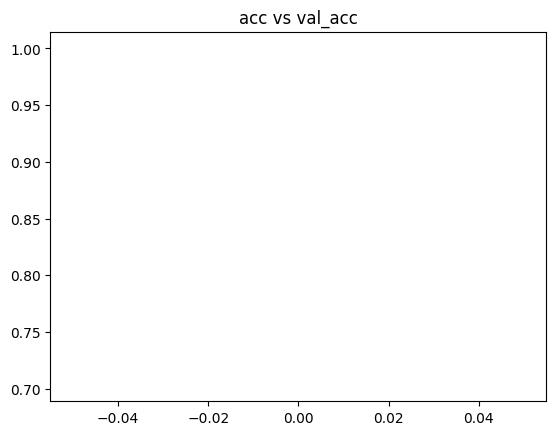

In [26]:
import matplotlib.pyplot as plt
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'],c="red")
plt.title("acc vs val_acc")
plt.show()